<a href="https://colab.research.google.com/github/Rash-Anj/TemperaturePrediction_Python/blob/main/TemperaturePrediction_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
from scipy.stats import skew
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [2]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load dataset from Google Drive in Colab
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/WeatherPrediction_Regression/weatherHistory.csv')

# Chech the shape of the data
data.shape

(96453, 12)

In [ ]:
data.head(10)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
5,2006-04-01 05:00:00.000 +0200,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258.0,14.9569,0.0,1016.66,Partly cloudy throughout the day.
6,2006-04-01 06:00:00.000 +0200,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259.0,9.9820,0.0,1016.72,Partly cloudy throughout the day.
7,2006-04-01 07:00:00.000 +0200,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260.0,9.9820,0.0,1016.84,Partly cloudy throughout the day.
8,2006-04-01 08:00:00.000 +0200,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259.0,9.9820,0.0,1017.37,Partly cloudy throughout the day.
9,2006-04-01 09:00:00.000 +0200,Partly Cloudy,rain,13.772222,13.772222,0.72,12.5258,279.0,9.9820,0.0,1017.22,Partly cloudy throughout the day.


In [ ]:
#Check datatype of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


# **Observation**


*   The categorical values are in the datatype 'object'
*   Better to convert them into the datatype 'category' in order to make the data processing more memory-efficient, faster, and easier to interpret.



In [ ]:
object_cols = data.select_dtypes(include=['object']).columns
data[object_cols] = data[object_cols].astype('category')

In [ ]:
# Check the unique values of the categorical columns
data["Formatted Date"].unique()

['2006-04-01 00:00:00.000 +0200', '2006-04-01 01:00:00.000 +0200', '2006-04-01 02:00:00.000 +0200', '2006-04-01 03:00:00.000 +0200', '2006-04-01 04:00:00.000 +0200', ..., '2016-09-09 19:00:00.000 +0200', '2016-09-09 20:00:00.000 +0200', '2016-09-09 21:00:00.000 +0200', '2016-09-09 22:00:00.000 +0200', '2016-09-09 23:00:00.000 +0200']
Length: 96429
Categories (96429, object): ['2006-01-01 00:00:00.000 +0100', '2006-01-01 01:00:00.000 +0100',
                             '2006-01-01 02:00:00.000 +0100', '2006-01-01 03:00:00.000 +0100', ...,
                             '2016-12-31 20:00:00.000 +0100', '2016-12-31 21:00:00.000 +0100',
                             '2016-12-31 22:00:00.000 +0100', '2016-12-31 23:00:00.000 +0100']

In [ ]:
data["Summary"].unique()

['Partly Cloudy', 'Mostly Cloudy', 'Overcast', 'Foggy', 'Breezy and Mostly Cloudy', ..., 'Drizzle', 'Windy and Dry', 'Dry and Mostly Cloudy', 'Breezy and Dry', 'Rain']
Length: 27
Categories (27, object): ['Breezy', 'Breezy and Dry', 'Breezy and Foggy',
                          'Breezy and Mostly Cloudy', ..., 'Windy and Foggy', 'Windy and Mostly Cloudy',
                          'Windy and Overcast', 'Windy and Partly Cloudy']

In [ ]:
data["Precip Type"].unique()

['rain', 'snow', NaN]
Categories (2, object): ['rain', 'snow']

In [ ]:
data["Daily Summary"].unique()

['Partly cloudy throughout the day.', 'Mostly cloudy throughout the day.', 'Foggy in the evening.', 'Foggy overnight and breezy in the morning.', 'Overcast throughout the day.', ..., 'Drizzle until morning.', 'Rain throughout the day.', 'Rain until morning.', 'Light rain overnight.', 'Rain until afternoon.']
Length: 214
Categories (214, object): ['Breezy and foggy starting in the evening.', 'Breezy and foggy until morning.',
                           'Breezy and mostly cloudy overnight.', 'Breezy and partly cloudy in the afternoon.', ...,
                           'Rain throughout the day.', 'Rain until afternoon.', 'Rain until morning.',
                           'Windy in the afternoon.']

In [ ]:
# Describe the dataset
data.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


# **Observation**


*   Column 'Loud Cover' has all 0 values.
*   No effect on the distribution.
*   Therefore, drop the column.

In [ ]:
## Drop 'Loud Cover'
data.drop(columns=['Loud Cover'], inplace=True)

# **Handling Missing Values**

In [ ]:
# check weather there's any null values in the dataset
data.isna().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

# **Observation**

*   Column 'Precip Type' has 517 NaN values out of 96453 entries.
*   Let's take a look at the records with NaN values for Precip Type

In [ ]:
# Get a boolean mask where NaN values occur in the DataFrame
nan_mask = pd.isna(data)

# Use the mask to filter rows with NaN values
rows_with_nan = data[nan_mask.any(axis=1)]

# Print the records where NaN values occur
print(rows_with_nan)

                      Formatted Date        Summary Precip Type  \
52672  2012-04-11 16:00:00.000 +0200  Mostly Cloudy         NaN   
52674  2012-04-11 18:00:00.000 +0200  Mostly Cloudy         NaN   
52675  2012-04-11 19:00:00.000 +0200  Mostly Cloudy         NaN   
52677  2012-04-11 21:00:00.000 +0200  Mostly Cloudy         NaN   
52678  2012-04-11 22:00:00.000 +0200  Mostly Cloudy         NaN   
...                              ...            ...         ...   
95584  2016-10-31 19:00:00.000 +0100  Mostly Cloudy         NaN   
95585  2016-10-31 20:00:00.000 +0100  Mostly Cloudy         NaN   
95586  2016-10-31 21:00:00.000 +0100  Mostly Cloudy         NaN   
95587  2016-10-31 22:00:00.000 +0100  Partly Cloudy         NaN   
95588  2016-10-31 23:00:00.000 +0100  Mostly Cloudy         NaN   

       Temperature (C)  Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
52672        19.016667                 19.016667      0.26            14.8764   
52674        17.850000           

In [ ]:
# Get the unique value count of Recip Type
data[['Precip Type']].value_counts()

Precip Type
rain           85224
snow           10712
dtype: int64

# **Observation**

*   Mode of Precip Type is 'rain'
*   Imputation : Nan values with 'rain'

In [ ]:
data['Precip Type'].fillna('rain', inplace=True)

In [ ]:
# Check for NaN values again
data.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

# **Handling Outliers**

In [ ]:

# Calculate skewness for each column and store numerical skewness values
#skewness_results = []
#for column in data.columns:
#    skewness = skew(data[column])
#    skewness_results.append((column, skewness))  # Store numerical skewness values as floats

# Print skewness results
#for column, skew_value in skewness_results:
#    print(f"Skewness for '{column}': {skew_value}")


# Quantifying outliers using z-score method
quanti_var = ['Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
                    'Wind Bearing (degrees)', 'Visibility (km)',
                    'Pressure (millibars)', 'Temperature (C)']

z_scores = data[quanti_var].apply(stats.zscore)

outliers_z = (z_scores.abs() > 3)

outliers_count_z = outliers_z.sum()
outliers_count_z

Apparent Temperature (C)      40
Humidity                      28
Wind Speed (km/h)           1208
Wind Bearing (degrees)         0
Visibility (km)                0
Pressure (millibars)        1288
Temperature (C)               39
dtype: int64

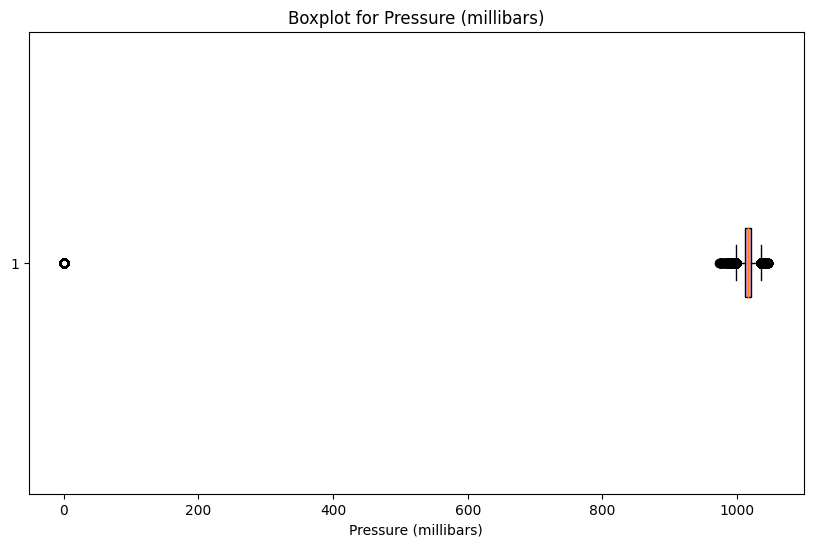

In [ ]:
# box plot for 'Pressure'
feature_column = 'Pressure (millibars)'

plt.figure(figsize=(10, 6))
plt.boxplot(data[feature_column], vert=False, patch_artist=True, boxprops = dict(facecolor='plum', color='black') )
plt.title(f'Boxplot for {feature_column}')
plt.xlabel('Pressure (millibars)')
plt.show()

# **Observation**


*   Looks like all the outliers are in the same value 0 which cannot be real.
*   Let's see a description of the outliers just to be sure.



In [ ]:
feature_column = 'Pressure (millibars)'

# Calculate Z-scores for the selected feature
z_scores = zscore(data[feature_column])
threshold = 3
outliers = (z_scores > threshold) | (z_scores < -threshold)

# Get a sample of outlier data for contextual and temporal analysis
#outlier_sample = data[outliers].sample(n=10)  # Change the sample size (n=10) as needed

# Get summary statistics for the outliers
outlier_summary = data[outliers][feature_column].describe()
outlier_summary

count    1288.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: Pressure (millibars), dtype: float64

# **Observation**


*   All the outliers are 0 which cannot be real.
*   It may be a data entry error.
*   Therefore, better impute the outliers with the Median after splitting the dataset.





In [ ]:


# Calculate the median of the feature excluding outliers
median_value = data[~outliers][feature_column].median()

# Impute outliers with the median value
data.loc[outliers, feature_column] = median_value

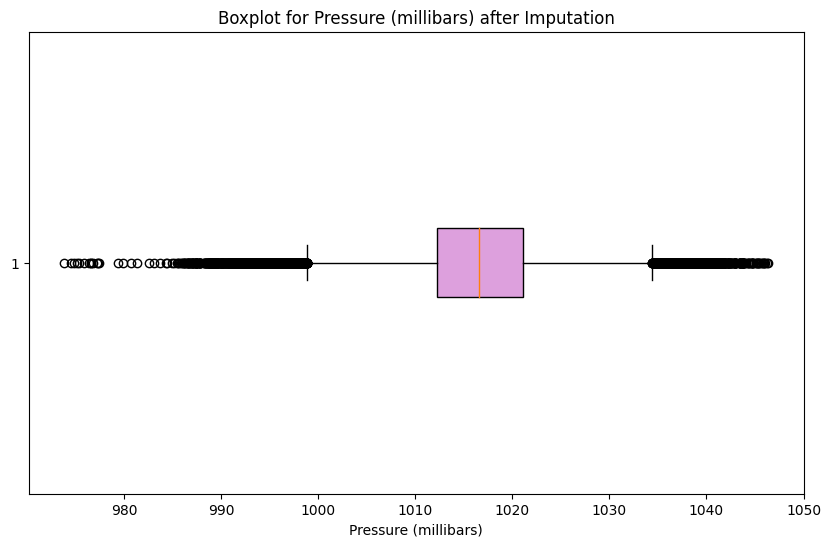

In [ ]:
# box plot for 'Pressure' after Imputation
feature_column = 'Pressure (millibars)'

plt.figure(figsize=(10, 6))
plt.boxplot(data[feature_column], vert=False, patch_artist=True, boxprops = dict(facecolor='plum', color='black') )
plt.title(f'Boxplot for {feature_column} after Imputation')
plt.xlabel('Pressure (millibars)')
plt.show()

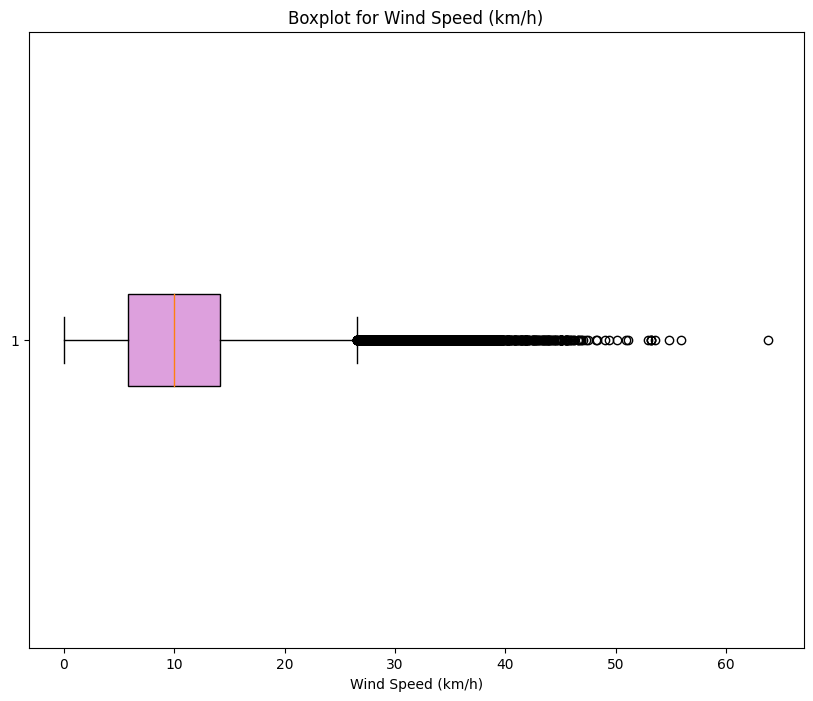

In [ ]:
# box plot for 'Wind Speed'
feature_column = 'Wind Speed (km/h)'

plt.figure(figsize=(10, 8))
plt.boxplot(data[feature_column], vert=False, patch_artist=True, boxprops = dict(facecolor='plum', color='black') )
plt.title(f'Boxplot for {feature_column}')
plt.xlabel('Wind Speed (km/h)')
plt.show()

# **Observation**


*   Outliers are apparently ranged from about 30 to 60 km/h.
*   Let's see more info about the outlier distribution.



In [ ]:
feature_column = 'Wind Speed (km/h)'

# Calculate Z-scores for the selected feature
z_scores = zscore(data[feature_column])
threshold = 3
outliers = (z_scores > threshold) | (z_scores < -threshold)

# Get a sample of outlier data for contextual and temporal analysis
#outlier_sample = data[outliers].sample(n=10)  # Change the sample size (n=10) as needed

# Get summary statistics for the outliers
outlier_summary = data[outliers][feature_column].describe()
outlier_summary

count    1208.000000
mean       35.949741
std         3.965484
min        31.556000
25%        33.117700
50%        34.671350
75%        37.818900
max        63.852600
Name: Wind Speed (km/h), dtype: float64

In [ ]:
# Get a sample of outlier data for contextual and temporal analysis
outlier_sample = data[outliers].sample(n=10)  # Change the sample size (n=10) as needed

outlier_sample

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
54870,2012-02-11 06:00:00.000 +0100,Overcast,snow,-16.111111,-23.027778,0.00,11.27,20.0,7.084,1029.9,Foggy starting overnight continuing until morn...
55350,2012-02-03 06:00:00.000 +0100,Overcast,snow,-12.222222,-20.827778,0.00,20.93,30.0,9.982,1029.4,Foggy starting in the morning continuing until...
55508,2012-02-09 20:00:00.000 +0100,Partly Cloudy,snow,-16.111111,-21.661111,0.00,8.05,180.0,4.025,1029.4,Foggy until morning.
54873,2012-02-11 09:00:00.000 +0100,Overcast,snow,-13.888889,-20.350000,0.00,11.27,40.0,9.982,1029.9,Foggy starting overnight continuing until morn...
55349,2012-02-03 05:00:00.000 +0100,Overcast,snow,-12.222222,-20.133333,0.00,17.71,30.0,9.982,1030.0,Foggy starting in the morning continuing until...
58166,2012-03-26 15:00:00.000 +0200,Partly Cloudy,rain,15.000000,15.000000,0.14,20.93,0.0,9.982,1027.7,Partly cloudy starting in the morning continui...
55472,2012-02-08 08:00:00.000 +0100,Foggy,snow,-17.777778,-17.777778,0.00,3.22,190.0,0.805,1035.0,Foggy until morning.
58164,2012-03-26 13:00:00.000 +0200,Partly Cloudy,rain,13.888889,13.888889,0.12,28.98,10.0,9.982,1028.0,Partly cloudy starting in the morning continui...
55086,2012-02-02 06:00:00.000 +0100,Partly Cloudy,snow,-12.777778,-19.011111,0.00,11.27,20.0,9.982,1027.6,Mostly cloudy throughout the day.
55352,2012-02-03 08:00:00.000 +0100,Overcast,snow,-12.222222,-21.144444,0.00,22.54,20.0,11.270,1029.7,Foggy starting in the morning continuing until...


# **Observation**


*   There's no connection can be seen with the Pressure outliers (being 0)
*   Moreover the wind speed matches with the data in the Summary and the Daily Summary fields also.
*   Therefore, let's keep these data as they are.





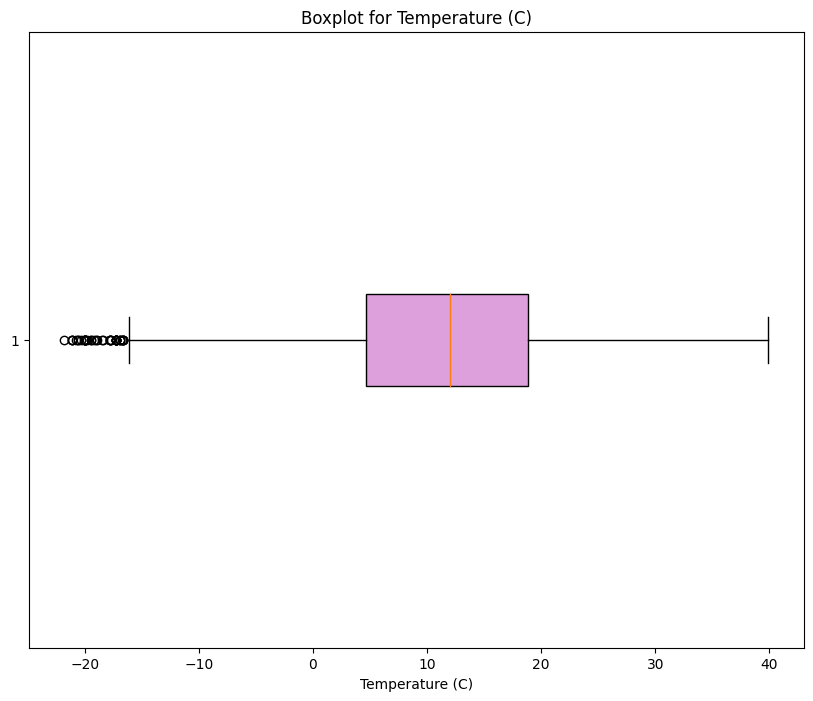

In [ ]:
# box plot for 'Temperature'
feature_column = 'Temperature (C)'

plt.figure(figsize=(10, 8))
plt.boxplot(data[feature_column], vert=False, patch_artist=True, boxprops = dict(facecolor='plum', color='black') )
plt.title(f'Boxplot for {feature_column}')
plt.xlabel('Temperature (C)')
plt.show()


# **Observation**


*   Looks like the outliers are only low temperatures (below -10)
*   Let's see these outliers in detail



In [ ]:
feature_column = 'Temperature (C)'

# Calculate Z-scores for the selected feature
z_scores = zscore(data[feature_column])
threshold = 3
outliers = (z_scores > threshold) | (z_scores < -threshold)

# Get a sample of outlier data for contextual and temporal analysis
outlier_sample = data[outliers].sample(n=10)  # Change the sample size (n=10) as needed

outlier_sample



,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
55483,2012-02-08 19:00:00.000 +0100,Clear,snow,-17.294444,-17.294444,0.91,3.6386,161.0,5.2003,1035.90,Foggy until morning.
54863,2012-02-10 23:00:00.000 +0100,Foggy,snow,-19.444444,-24.638889,0.78,6.4400,20.0,0.6440,1033.70,Foggy starting in the morning continuing until...
54866,2012-02-11 02:00:00.000 +0100,Foggy,snow,-20.555556,-25.922222,0.78,6.4400,30.0,1.4490,1032.10,Foggy starting overnight continuing until morn...
55487,2012-02-08 23:00:00.000 +0100,Foggy,snow,-20.000000,-20.000000,0.78,3.2200,200.0,1.2880,1035.40,Foggy until morning.
55495,2012-02-09 07:00:00.000 +0100,Foggy,snow,-20.783333,-20.783333,0.80,4.4275,181.0,1.7871,1032.33,Foggy until morning.
55412,2012-02-05 20:00:00.000 +0100,Foggy,snow,-17.777778,-23.616667,0.00,8.0500,320.0,2.5760,1032.20,Foggy in the evening.
55510,2012-02-09 22:00:00.000 +0100,Foggy,snow,-18.405556,-18.405556,0.80,3.0912,326.0,3.1395,1030.37,Foggy until morning.
54864,2012-02-11 00:00:00.000 +0100,Clear,snow,-20.000000,-27.716667,0.78,11.2700,20.0,0.0000,1033.30,Foggy starting overnight continuing until morn...
55494,2012-02-09 06:00:00.000 +0100,Foggy,snow,-21.111111,-21.111111,0.71,3.2200,190.0,1.9320,1032.60,Foggy until morning.
55492,2012-02-09 04:00:00.000 +0100,Foggy,snow,-20.277778,-25.072222,0.79,5.6672,158.0,1.8032,1033.53,Foggy until morning.


# **Observation**


*   Almost all the outliers are very low temperatures and they are recorded in winter season like December, February.
*   Therefore, these data points can be real.
*   So, let's keep them as they are.





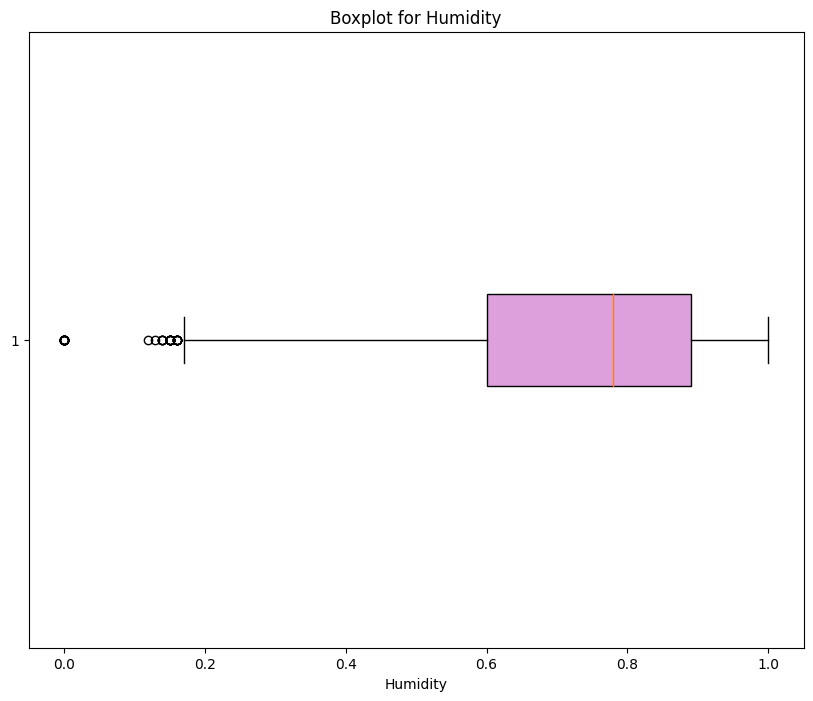

In [ ]:
# box plot for 'Humidity'
feature_column = 'Humidity'

plt.figure(figsize=(10, 8))
plt.boxplot(data[feature_column], vert=False, patch_artist=True, boxprops = dict(facecolor='plum', color='black') )
plt.title(f'Boxplot for {feature_column}')
plt.xlabel('Humidity')
plt.show()

# **Observation**


*   The outliers are very low than the main distribution.
*   Let's check more details and see.



In [ ]:
feature_column = 'Humidity'

# Calculate Z-scores for the selected feature
z_scores = zscore(data[feature_column])
threshold = 3
outliers = (z_scores > threshold) | (z_scores < -threshold)

# Get a sample of outlier data for contextual and temporal analysis
outlier_sample = data[outliers].sample(n=10)  # Change the sample size (n=10) as needed

outlier_sample

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
55086,2012-02-02 06:00:00.000 +0100,Partly Cloudy,snow,-12.777778,-19.011111,0.00,11.2700,20.0,9.982,0.0,1027.60,Mostly cloudy throughout the day.
55511,2012-02-09 23:00:00.000 +0100,Foggy,snow,-17.777778,-17.777778,0.00,0.0000,0.0,1.449,0.0,1030.60,Foggy until morning.
58166,2012-03-26 15:00:00.000 +0200,Partly Cloudy,rain,15.000000,15.000000,0.14,20.9300,0.0,9.982,0.0,1027.70,Partly cloudy starting in the morning continui...
19958,2008-02-17 14:00:00.000 +0100,Partly Cloudy,snow,-1.111111,-1.111111,0.00,4.4275,12.0,9.982,0.0,1043.04,Partly cloudy starting in the morning continui...
54873,2012-02-11 09:00:00.000 +0100,Overcast,snow,-13.888889,-20.350000,0.00,11.2700,40.0,9.982,0.0,1029.90,Foggy starting overnight continuing until morn...
54858,2012-02-10 18:00:00.000 +0100,Foggy,snow,-15.000000,-15.000000,0.00,0.0000,0.0,2.576,0.0,1034.40,Foggy starting in the morning continuing until...
54870,2012-02-11 06:00:00.000 +0100,Overcast,snow,-16.111111,-23.027778,0.00,11.2700,20.0,7.084,0.0,1029.90,Foggy starting overnight continuing until morn...
12615,2007-07-17 15:00:00.000 +0200,Clear,rain,37.777778,35.388889,0.14,17.4202,210.0,9.982,0.0,1015.04,Clear throughout the day.
29627,2009-01-25 11:00:00.000 +0100,Foggy,rain,1.111111,-3.950000,0.00,20.9300,350.0,0.161,0.0,1000.10,Foggy starting overnight continuing until afte...
55349,2012-02-03 05:00:00.000 +0100,Overcast,snow,-12.222222,-20.133333,0.00,17.7100,30.0,9.982,0.0,1030.00,Foggy starting in the morning continuing until...


In [ ]:
# Get summary statistics for the outliers
outlier_summary = data[outliers][feature_column].describe()
outlier_summary

count    28.000000
mean      0.028929
std       0.056525
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       0.140000
Name: Humidity, dtype: float64

# **Observation**


*   The Humidity outliers do not show any connection with the Pressure outliers (being 0)
*   But still humidity being 0 and below 0.14 is unrealistic.
*   Especially, having such low humidity when there's rain is impossible.
*   So, these data points cannot be trusted.
*   As there are only 28 out of 96453 entries let's remove those outliers after splitting the dataset.





In [ ]:
# Identify non-outliers based on the threshold
non_outliers = (z_scores <= threshold) & (z_scores >= -threshold)

# Drop outliers from the DataFrame
# Data with no outliers : data_new
data_new = data[non_outliers]

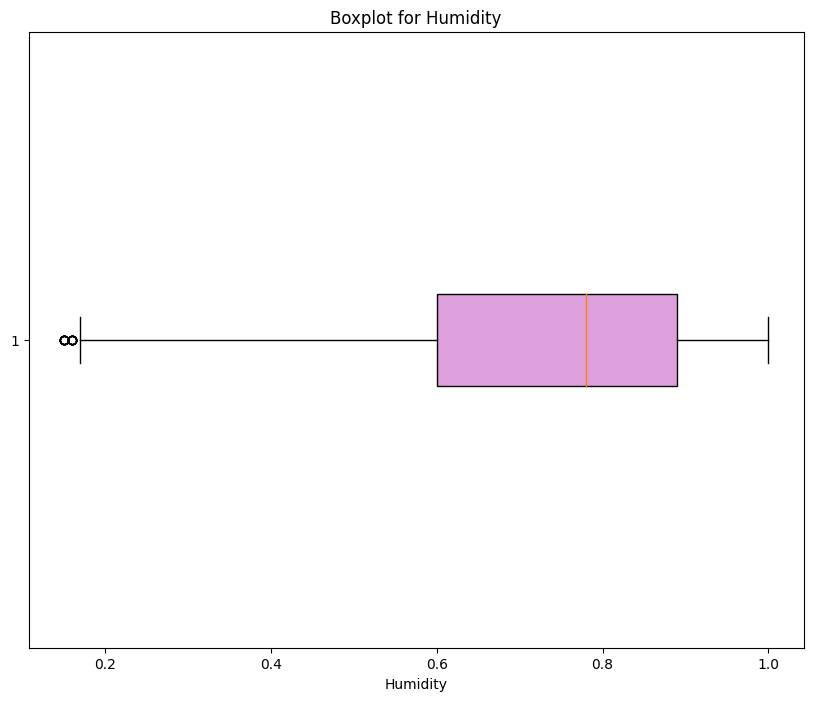

In [ ]:
# box plot for 'Humidity' after droping outliers
feature_column = 'Humidity'

plt.figure(figsize=(10, 8))
plt.boxplot(data_new[feature_column], vert=False, patch_artist=True, boxprops = dict(facecolor='plum', color='black') )
plt.title(f'Boxplot for {feature_column}')
plt.xlabel('Humidity')
plt.show()

# **Q-Q Plots of the Numerical Features**

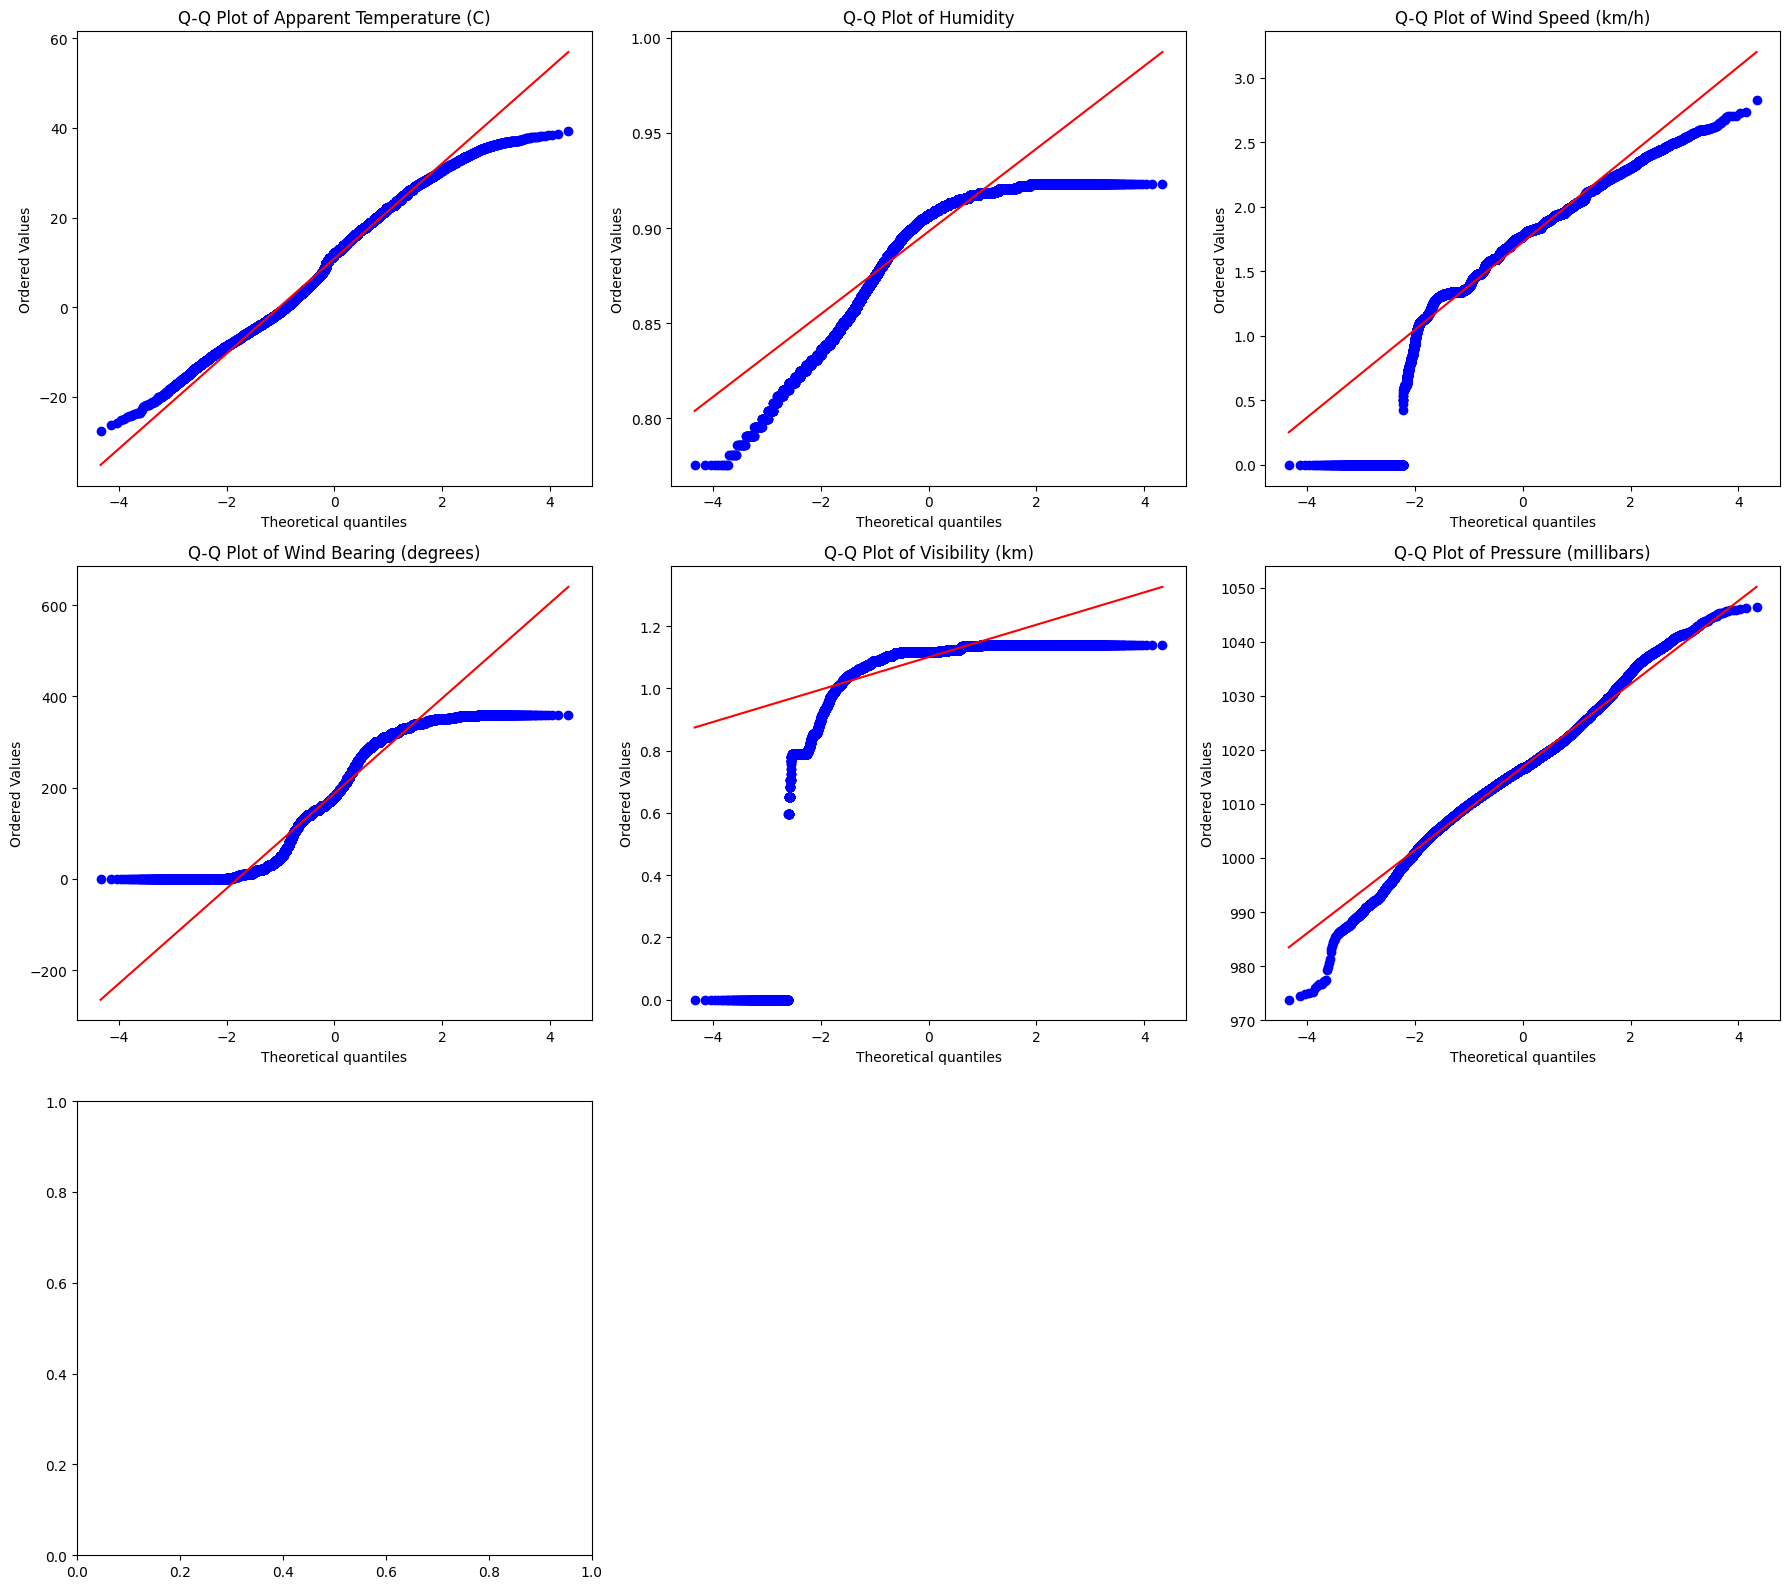

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(18, 16))

num_vars = ['Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
            'Wind Bearing (degrees)', 'Visibility (km)',
            'Pressure (millibars)']

for i, var in enumerate(num_vars):
    row = i // 3
    col = i % 3
    stats.probplot(data_new[var], dist="norm", plot=axes[row, col])
    axes[row, col].set_title(f'Q-Q Plot of {var}')

axes[-1, -1].axis('off')
axes[-1, -2].axis('off')

plt.tight_layout()
plt.show()

# **Histograms for the Numerical Features**

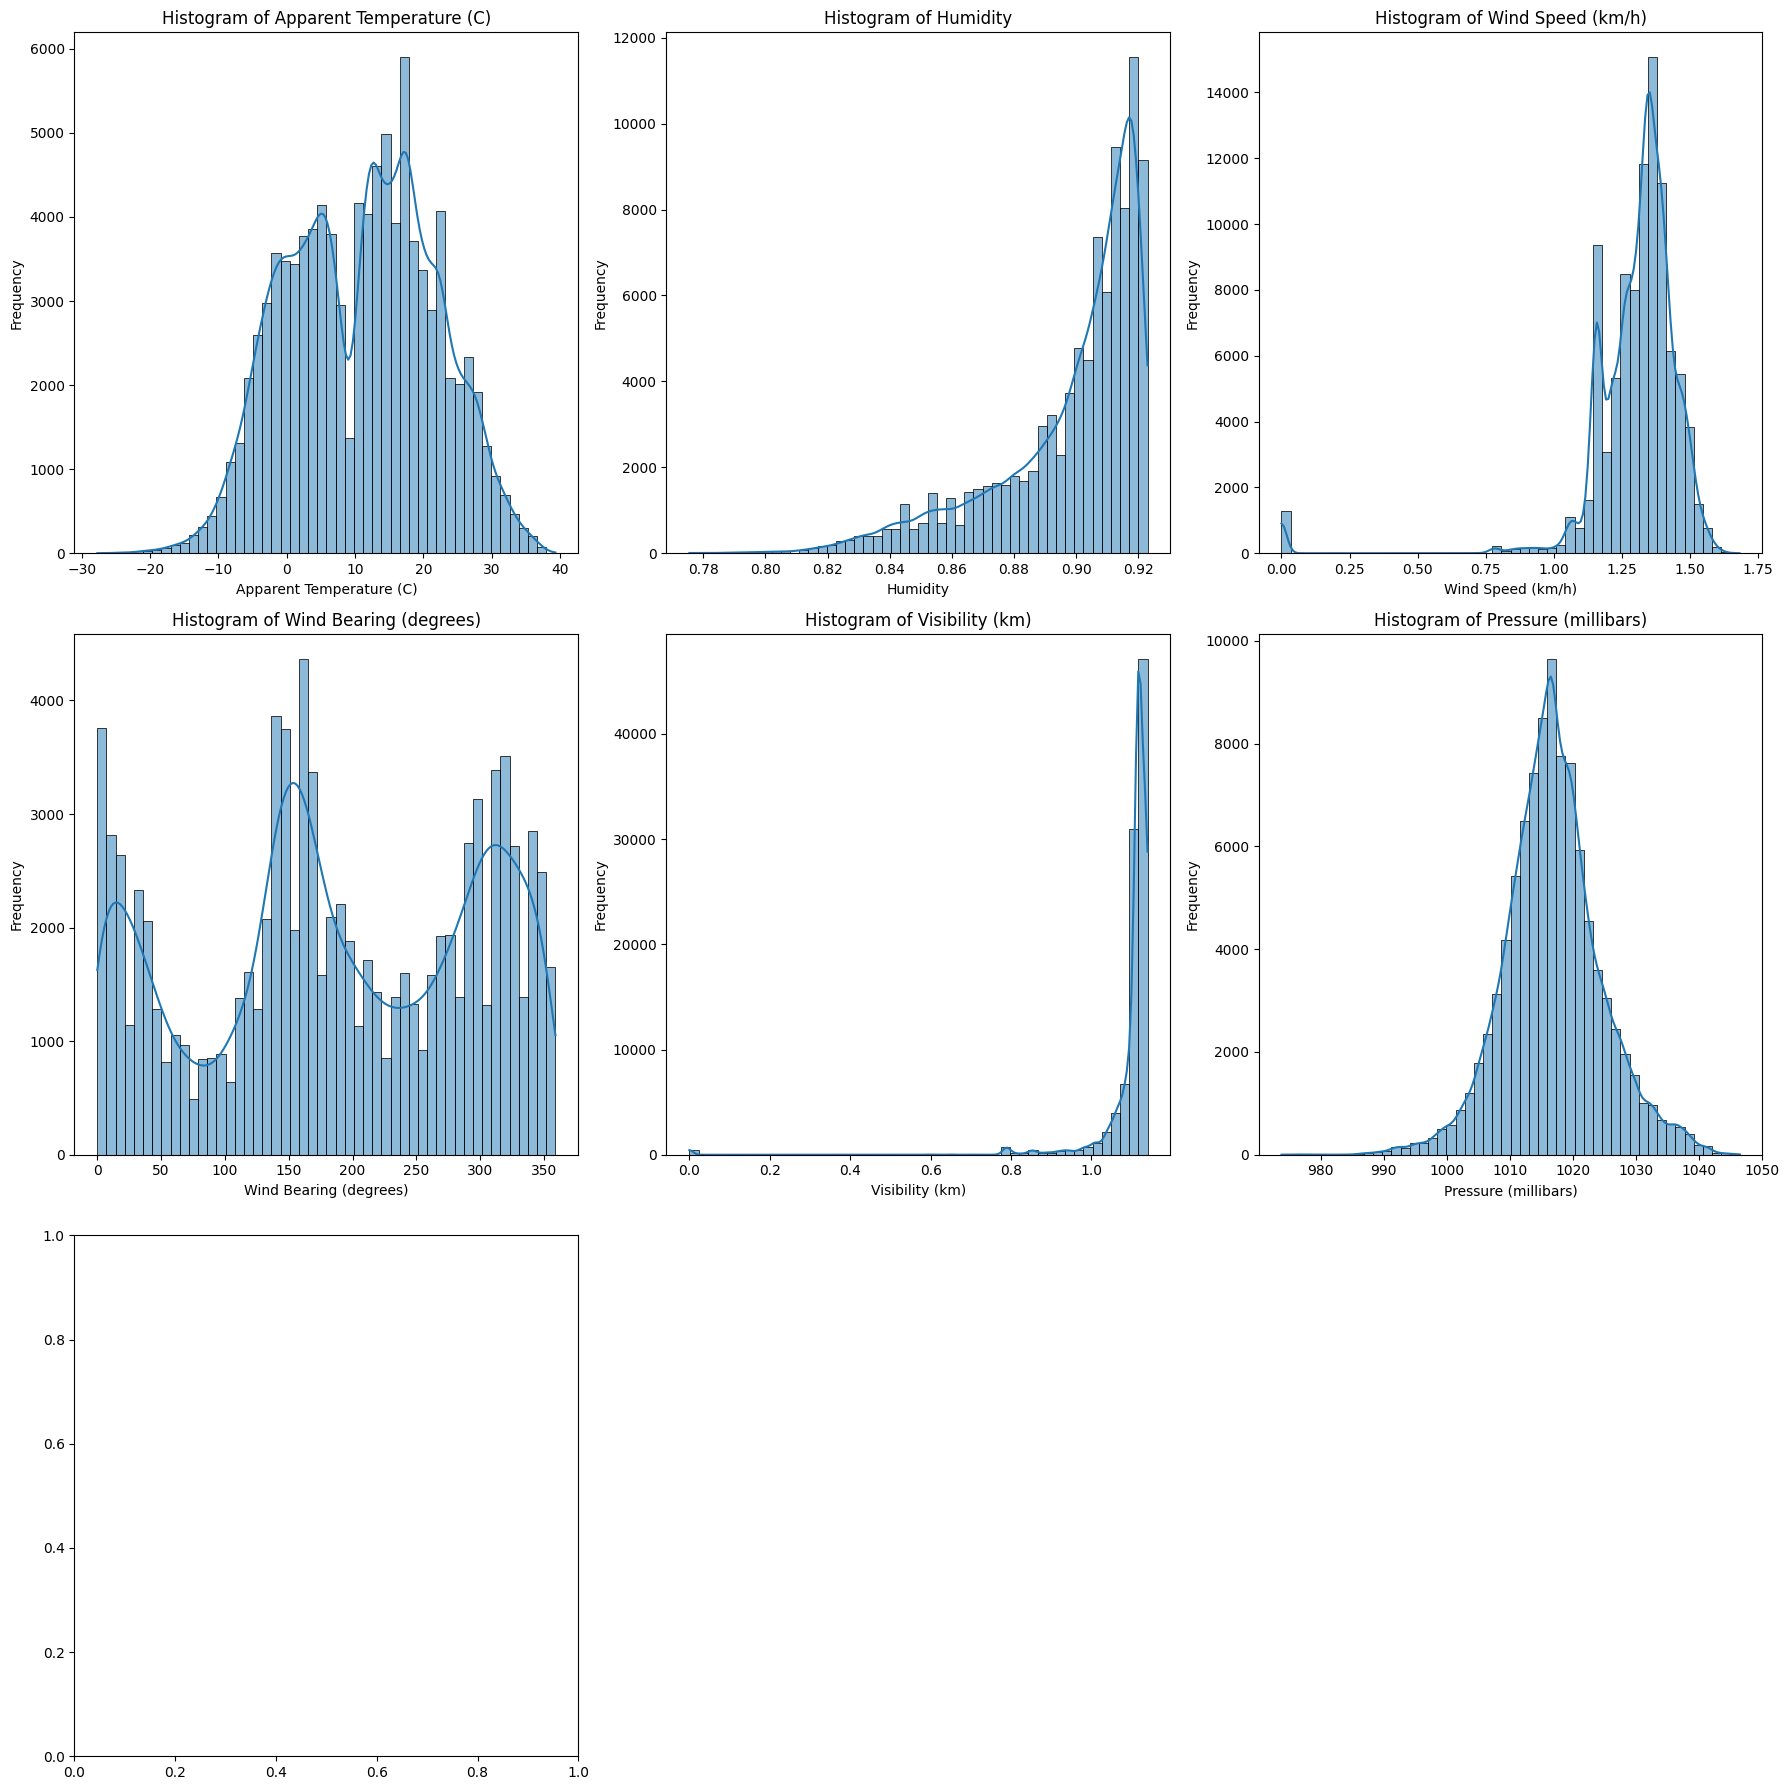

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(18, 18))

for i, var in enumerate(num_vars):
    row = i // 3
    col = i % 3
    sns.histplot(data_new[var], bins=50, kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Histogram of {var}')
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel('Frequency')

axes[-1, -1].axis('off')
axes[-1, -2].axis('off')

plt.tight_layout()
plt.show()


# **Observation**


*   Apparent Temperature : Looks like normally distributed; but slightly left skewed.
*   Humidity : Distribution is left skewed
*   Wind Speed : Distribution is right skewed.
*   Wind Baring : Normally distributed
*   Visibility : Left skewed
*   Pressure : Normally distributed







# **Transformation**

In [ ]:
# Applying Square Root Transformation on Wind Speed as it is useful for reducing the impact of outliers and handling right-skewed data.

feature_column_1 = 'Wind Speed (km/h)'

# Apply square root transformation to the feature
data[feature_column_1] = data[feature_column_1].apply(lambda x: x**0.5)


In [ ]:
# Applying exponential transformation on Humidity

feature_column_2 = 'Humidity'

# Define the power for exponential transformation (e.g., 0.5 for square root, 2 for square)
exponential_power = 2  # Replace with the desired power

# Apply exponential transformation to the feature
data['transformed_Humidity'] = data[feature_column_2] ** exponential_power




In [ ]:
# Applying exponential transformation on Visibility

feature_column_3 = 'Visibility (km)'

# Define the power for exponential transformation (e.g., 0.5 for square root, 2 for square)
exponential_power = 2  # Replace with the desired power

# Apply exponential transformation to the feature
data['transformed_Visibility'] = data[feature_column_3] ** exponential_power

In [ ]:
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,transformed_Humidity,transformed_Visibility
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,3.757619,251.0,15.8263,1015.13,Partly cloudy throughout the day.,0.7921,250.471772
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,3.776851,259.0,15.8263,1015.63,Partly cloudy throughout the day.,0.7396,250.471772
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,1.982019,204.0,14.9569,1015.94,Partly cloudy throughout the day.,0.7921,223.708858
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,3.755476,269.0,15.8263,1016.41,Partly cloudy throughout the day.,0.6889,250.471772
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,3.323342,259.0,15.8263,1016.51,Partly cloudy throughout the day.,0.6889,250.471772


# **Observation**


*   Having Date and Time in the same feature is bothersome.
*   Let's devide the feature into two



In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Formatted Date            96453 non-null  category
 1   Summary                   96453 non-null  category
 2   Precip Type               95936 non-null  category
 3   Temperature (C)           96453 non-null  float64 
 4   Apparent Temperature (C)  96453 non-null  float64 
 5   Humidity                  96453 non-null  float64 
 6   Wind Speed (km/h)         96453 non-null  float64 
 7   Wind Bearing (degrees)    96453 non-null  float64 
 8   Visibility (km)           96453 non-null  float64 
 9   Pressure (millibars)      96453 non-null  float64 
 10  Daily Summary             96453 non-null  category
 11  transformed_Humidity      96453 non-null  float64 
 12  transformed_Visibility    96453 non-null  float64 
dtypes: category(4), float64(9)
memory usage: 10.1 

In [ ]:
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'], utc=True)


data['Hour'] = data['Formatted Date'].dt.hour

def time_of_the_day(hour):
    if 0 <= hour < 6:
        return 'Early Morning'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 20:
        return 'Evening'
    else:
        return 'Night'

data['Month'] = data['Formatted Date'].dt.month


def season(month):
    if 3 <= month < 6:
        return 'Spring'
    elif 6 <= month < 9:
        return 'Summer'
    elif 9 <= month < 12:
        return 'Autumn'
    elif (1 <= month < 3) and (month==12):
        return 'Winter'

data['Time of the Day'] = data['Hour'].apply(time_of_the_day)
data['Season'] = data['Month'].apply(season)



In [ ]:
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,transformed_Humidity,transformed_Visibility,Hour,Date,Time of the Day,Season,Month
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,3.757619,251.0,15.8263,1015.13,Partly cloudy throughout the day.,0.7921,250.471772,22,3,Night,Spring,3
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,3.776851,259.0,15.8263,1015.63,Partly cloudy throughout the day.,0.7396,250.471772,23,3,Night,Spring,3
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,1.982019,204.0,14.9569,1015.94,Partly cloudy throughout the day.,0.7921,223.708858,0,4,Early Morning,Spring,4
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,3.755476,269.0,15.8263,1016.41,Partly cloudy throughout the day.,0.6889,250.471772,1,4,Early Morning,Spring,4
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,3.323342,259.0,15.8263,1016.51,Partly cloudy throughout the day.,0.6889,250.471772,2,4,Early Morning,Spring,4


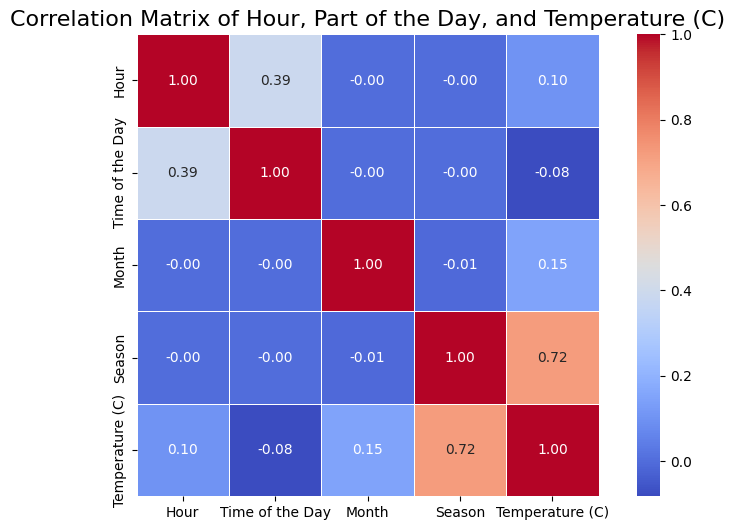

In [ ]:
data['Time of the Day'] = data['Time of the Day'].astype('category').cat.codes
data['Season'] = data['Season'].astype('category').cat.codes

corr_matrix = data[['Hour', 'Time of the Day','Month','Season', 'Temperature (C)']].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5, square=True)
plt.title('Correlation Matrix of Hour, Part of the Day, and Temperature (C)', fontsize=16)
plt.show()

# **Observation**


*   Season shows a very strong positive corelation with the Temperature


*   Month have a very small corelation with the season and comparatively small corelation with target variable. Therefore I'm going to drop Month.





In [ ]:
## Drop 'Month' which I mistakenly added
data.drop(columns=['Month'], inplace=True)

In [ ]:
## Drop 'Date' which I mistakenly added
data.drop(columns=['Date'], inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Summary                   96453 non-null  category
 1   Precip Type               95936 non-null  category
 2   Temperature (C)           96453 non-null  float64 
 3   Apparent Temperature (C)  96453 non-null  float64 
 4   Humidity                  96453 non-null  float64 
 5   Wind Speed (km/h)         96453 non-null  float64 
 6   Wind Bearing (degrees)    96453 non-null  float64 
 7   Visibility (km)           96453 non-null  float64 
 8   Pressure (millibars)      96453 non-null  float64 
 9   Hour                      96453 non-null  int64   
 10  Time of the Day           96453 non-null  int8    
 11  Season                    96453 non-null  int8    
dtypes: category(2), float64(7), int64(1), int8(2)
memory usage: 6.3 MB


# **Feature Coding on Categorical Features**

In [ ]:
import pandas as pd

# perform one hot encoding with k
#data = pd.get_dummies(data, columns=['Summary','Precip Type','Daily Summary'])
data_encoded = pd.get_dummies(data, columns=['Summary','Precip Type','Time of the Day', 'Season'])

In [ ]:
data_encoded.head(5)

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Hour,Summary_Breezy,Summary_Breezy and Dry,...,Precip Type_snow,Time of the Day_0,Time of the Day_1,Time of the Day_2,Time of the Day_3,Time of the Day_4,Season_-1,Season_0,Season_1,Season_2
0,9.472222,7.388889,0.89,3.757619,251.0,15.8263,1015.13,22,0,0,...,0,0,0,0,0,1,0,0,1,0
1,9.355556,7.227778,0.86,3.776851,259.0,15.8263,1015.63,23,0,0,...,0,0,0,0,0,1,0,0,1,0
2,9.377778,9.377778,0.89,1.982019,204.0,14.9569,1015.94,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,8.288889,5.944444,0.83,3.755476,269.0,15.8263,1016.41,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,8.755556,6.977778,0.83,3.323342,259.0,15.8263,1016.51,2,0,0,...,0,0,1,0,0,0,0,0,1,0




*   As I already have Season, Time of the Day, Hour and Month; I'm going to drop Formatted Date.
*   I'm also going to drop Daily Summary as it includes likely the same in Summary.



In [ ]:
data.drop(columns=['Formatted Date', 'Daily Summary'], inplace=True)

In [ ]:
data.drop(columns=['transformed_Humidity', 'transformed_Visibility'], inplace=True)

In [ ]:
data.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Hour,Time of the Day,Season
0,Partly Cloudy,rain,9.472222,7.388889,0.89,3.757619,251.0,15.8263,1015.13,22,4,1
1,Partly Cloudy,rain,9.355556,7.227778,0.86,3.776851,259.0,15.8263,1015.63,23,4,1
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,1.982019,204.0,14.9569,1015.94,0,1,1
3,Partly Cloudy,rain,8.288889,5.944444,0.83,3.755476,269.0,15.8263,1016.41,1,1,1
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,3.323342,259.0,15.8263,1016.51,2,1,1


# **Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
#data = pd.get_dummies(data, columns=['Summary','Precip Type','Daily Summary'])

#numeric_data = data_encoded.drop(columns=['Formatted Date'])

# create the scaler object
scaler = StandardScaler()

# fit the scaler to the  data
scaler.fit(data_encoded)

train_scaled = scaler.transform(data_encoded)
x = pd.DataFrame(train_scaled)
x

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,-0.257599,-0.324035,0.793470,0.603956,0.591256,1.306976,0.101685,1.516915,-0.023668,-0.00322,...,-0.353461,-0.512999,-0.577346,-0.377971,-0.577362,2.236193,-0.572861,-0.575926,1.723723,-0.580475
1,-0.269814,-0.339097,0.639996,0.621774,0.665756,1.306976,0.105960,1.661382,-0.023668,-0.00322,...,-0.353461,-0.512999,-0.577346,-0.377971,-0.577362,2.236193,-0.572861,-0.575926,1.723723,-0.580475
2,-0.267487,-0.138102,0.793470,-1.041137,0.153570,1.099586,0.108610,-1.661351,-0.023668,-0.00322,...,-0.353461,-0.512999,1.732063,-0.377971,-0.577362,-0.447189,-0.572861,-0.575926,1.723723,-0.580475
3,-0.381489,-0.459071,0.486521,0.601971,0.758881,1.306976,0.112628,-1.516884,-0.023668,-0.00322,...,-0.353461,-0.512999,1.732063,-0.377971,-0.577362,-0.447189,-0.572861,-0.575926,1.723723,-0.580475
4,-0.332631,-0.362469,0.486521,0.201598,0.665756,1.306976,0.113483,-1.372417,-0.023668,-0.00322,...,-0.353461,-0.512999,1.732063,-0.377971,-0.577362,-0.447189,-0.572861,-0.575926,1.723723,-0.580475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,1.474532,1.417400,-1.559811,0.194858,-1.457488,1.372265,0.095102,0.794582,-0.023668,-0.00322,...,-0.353461,-0.512999,-0.577346,2.645704,-0.577362,-0.447189,-0.572861,1.736335,-0.580140,-0.580475
96449,1.324468,1.283404,-1.304020,0.066213,-1.559925,1.241686,0.101942,0.939049,-0.023668,-0.00322,...,-0.353461,-0.512999,-0.577346,2.645704,-0.577362,-0.447189,-0.572861,1.736335,-0.580140,-0.580475
96450,1.058076,1.045534,-0.894753,-0.100480,-1.466800,1.372265,0.106216,1.083515,-0.023668,-0.00322,...,-0.353461,-0.512999,-0.577346,2.645704,-0.577362,-0.447189,-0.572861,1.736335,-0.580140,-0.580475
96451,1.003983,0.997233,-0.690120,0.128926,-1.559925,1.372265,0.108696,1.227982,-0.023668,-0.00322,...,-0.353461,-0.512999,-0.577346,-0.377971,-0.577362,2.236193,-0.572861,1.736335,-0.580140,-0.580475


# **Using PCA for Feature Reduction**

In [ ]:
data_encoded

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Hour,Summary_Breezy,Summary_Breezy and Dry,...,Precip Type_snow,Time of the Day_0,Time of the Day_1,Time of the Day_2,Time of the Day_3,Time of the Day_4,Season_-1,Season_0,Season_1,Season_2
0,9.472222,7.388889,0.89,3.757619,251.0,15.8263,1015.13,22,0,0,...,0,0,0,0,0,1,0,0,1,0
1,9.355556,7.227778,0.86,3.776851,259.0,15.8263,1015.63,23,0,0,...,0,0,0,0,0,1,0,0,1,0
2,9.377778,9.377778,0.89,1.982019,204.0,14.9569,1015.94,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,8.288889,5.944444,0.83,3.755476,269.0,15.8263,1016.41,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,8.755556,6.977778,0.83,3.323342,259.0,15.8263,1016.51,2,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,26.016667,26.016667,0.43,3.316067,31.0,16.1000,1014.36,17,0,0,...,0,0,0,1,0,0,0,1,0,0
96449,24.583333,24.583333,0.48,3.177216,20.0,15.5526,1015.16,18,0,0,...,0,0,0,1,0,0,0,1,0,0
96450,22.038889,22.038889,0.56,2.997299,30.0,16.1000,1015.66,19,0,0,...,0,0,0,1,0,0,0,1,0,0
96451,21.522222,21.522222,0.60,3.244904,20.0,16.1000,1015.95,20,0,0,...,0,0,0,0,0,1,0,1,0,0


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Separate features and target variable
X = data_encoded.drop(columns=['Temperature (C)'])
y = data_encoded['Temperature (C)']

# Assuming 'X' contains your preprocessed feature matrix (without the target variable)
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA for feature reduction
pca = PCA(n_components=2)  # Choose the number of components you want to keep
X_pca = pca.fit_transform(X_scaled)

# X_pca now contains the reduced features
data_pca = pd.DataFrame(data = X_pca)
data_pca.head(10)


,0,1
0,-1.047693,1.896468
1,-1.109604,2.004067
2,-0.020661,-2.387534
3,-0.483736,-2.217995
4,-0.202455,-2.056122
5,-0.457421,-2.056272
6,0.130370,-2.034247
7,-0.036886,-1.900872
8,-0.678364,-0.933117
9,-0.992183,-0.799515


import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_0, *[0], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_1, *[1], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plot(df, x_colname, y_colname, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(6 * figscale, 6 * figscale))
  df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha)
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plot(_df_2, *[0, 1], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_3, *[0], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_4, *[1], **{})
chart

In [ ]:
pca.explained_variance_ratio_

array([0.09150879, 0.04984652])

# **Split the dataset**

In [ ]:
from sklearn.model_selection import train_test_split

X = data_encoded.drop(['Temperature (C)'], axis=1)
y = data_encoded['Temperature (C)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((77162, 45), (19291, 45), (77162,), (19291,))

# **Linear Regression with Cross-Validation**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Linear Regression with Cross-Validation
linear_reg = LinearRegression()
linear_reg_scores = cross_val_score(linear_reg, X, y, cv=10, scoring='neg_mean_squared_error')
linear_reg_rmse_scores = np.sqrt(-linear_reg_scores)
print("Linear Regression RMSE scores:", linear_reg_rmse_scores)


Linear Regression RMSE scores: [0.87085818 0.87879341 0.90861304 0.98553913 0.87174628 1.00500785
 0.90594193 0.80031256 0.82608574 0.81472283]


In [ ]:
average_rmse_linear = np.mean([0.87085818, 0.87879341, 0.90861304, 0.98553913, 0.87174628, 1.00500785, 0.90594193, 0.80031256, 0.82608574, 0.81472283])
print("Average RMSE (Linear):", average_rmse_linear)


Average RMSE (Linear): 0.8867620949999999


# **Lasso Regression with Cross-Validation**

In [ ]:
from sklearn.linear_model import LassoCV

# Lasso Regression with Cross-Validation
lasso_reg = LassoCV(cv=10)
lasso_reg.fit(X, y)
lasso_reg_scores = np.sqrt(-cross_val_score(lasso_reg, X, y, cv=10, scoring='neg_mean_squared_error'))
print("Lasso Regression RMSE scores:", lasso_reg_scores)

Lasso Regression RMSE scores: [0.92502708 1.00017102 1.01735459 1.04516952 0.93802104 1.09887517
 0.97122052 0.88324968 0.9053053  0.85275402]


In [ ]:
average_rmse_lasso = np.mean([0.92502708, 1.00017102, 1.01735459, 1.04516952, 0.93802104, 1.09887517, 0.97122052, 0.88324968, 0.9053053,  0.85275402])
print("Average RMSE (Lasso):", average_rmse_lasso)

Average RMSE (Lasso): 0.9637147940000002


# **Ridge Regression with Cross-Validation**

In [ ]:
from sklearn.linear_model import RidgeCV

# Ridge Regression with Cross-Validation
ridge_reg = RidgeCV(cv=10)
ridge_reg.fit(X, y)
ridge_reg_scores = np.sqrt(-cross_val_score(ridge_reg, X, y, cv=10, scoring='neg_mean_squared_error'))
print("Ridge Regression RMSE scores:", ridge_reg_scores)


Ridge Regression RMSE scores: [0.87076747 0.8793252  0.90862156 0.98522166 0.87162505 1.00562658
 0.90559297 0.80026061 0.82578221 0.81396215]


In [ ]:
average_rmse_ridge = np.mean([0.87076747, 0.8793252,  0.90862156, 0.98522166, 0.87162505, 1.00562658, 0.90559297, 0.80026061, 0.82578221, 0.81396215])
print("Average RMSE (Ridge):", average_rmse_ridge)

Average RMSE (Ridge): 0.8866785460000001


# **Comparison**

In [ ]:
variables = {'Average RMSE (Linear)': 0.8867620949999999, 'Average RMSE (Lasso)': 0.9637147940000002, 'Average RMSE (Ridge)': 0.8866785460000001 }

# Sorting the RMSE from minimum to maximum
sorted_variables = sorted(variables.items(), key=lambda x: x[1])

print("Sorted Average RMSE values (from minimum to maximum) :")
for variable, value in sorted_variables:
    print(f"{variable}: {value}")


Sorted Average RMSE values (from minimum to maximum) :
Average RMSE (Ridge): 0.8866785460000001
Average RMSE (Linear): 0.8867620949999999
Average RMSE (Lasso): 0.9637147940000002


# **Observation**


*   Ridge Regression has the minimum Average RMSE value being followed by Linear and Lasso Regression models respectively.
*   That means Redge Regression has the lowest prediction error in the model.
*   Therefore, Ridge Regression is more suitable to use in this problem.



